# <u><h><center> Pauta Taller 2b</center></h></u>
## IIC2115 - Programación Como Herramienta para la Ingeniería
### Ayudante: Felipe Fuentes

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_pinguinos = pd.read_csv("penguins.csv")
df_pinguinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   culmen_length_mm   342 non-null    float64
 4   culmen_depth_mm    342 non-null    float64
 5   flipper_length_mm  308 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                334 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [3]:
# Veamos si tiene valores nulos
#Eliminamos la columna unnamed
df_pinguinos = df_pinguinos.drop('Unnamed: 0', 1)

df_pinguinos.apply(lambda x: sum(x.isnull()),axis=0)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm    36
body_mass_g           2
sex                  10
dtype: int64

In [4]:
# Eliminamos las filas nulas
df_pinguinos_not_null= df_pinguinos.copy().dropna()

In [5]:
df_pinguinos_not_null.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
from sklearn.preprocessing import LabelEncoder

pinguinos_variables = ['species', 'island', 'sex']
label_encoder = LabelEncoder()
for i in pinguinos_variables:
    df_pinguinos_not_null[i] = label_encoder.fit_transform(df_pinguinos_not_null[i])
df_pinguinos_not_null.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


In [31]:
#Creamos training set y test_set
features = ["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm", "body_mass_g", "sex"]
target= "species"

train, test = train_test_split(df_pinguinos_not_null, test_size=0.3)
training_set, train_target = train[features], train[target]
test_set, test_target = test[features], test[target]

In [58]:
#Normalizamos los datos

scaler = StandardScaler()

training_set = scaler.fit_transform(training_set)
test_set = scaler.transform(test_set)

#se usara para la dimensionalidad al final del ejercicio
training_set_pca=  training_set
training_targe_pca= train_target

training_set

array([[ 1.73324845, -1.62699481,  1.18871091, -0.58929375, -0.01718819,
         0.9908706 ],
       [-0.89478169,  0.83389299, -0.77687406,  1.4113109 ,  1.08402157,
         0.9908706 ],
       [ 0.41923338, -0.85679329,  2.06805156, -0.37494325, -0.07836651,
         0.9908706 ],
       ...,
       [ 0.41923338, -1.06343272,  0.77490355, -0.80364425, -0.6289714 ,
        -0.97217492],
       [-0.89478169,  1.00296161, -1.34585918,  0.76825941,  0.50282753,
        -0.97217492],
       [-0.89478169, -0.68772466,  0.93008131, -0.94654458,  0.10516845,
         0.9908706 ]])

In [71]:
from sklearn import metrics

#funcion que recibe los datos y el modelo (materiales del curso)

def training_and_eval(model, training, test, training_target, test_target):
    model.fit(training, training_target)
    predictions = model.predict(test)
    print(predictions)
    print(test_target)
    accuracy = metrics.accuracy_score(predictions, test_target)
    print(f"Accuracy: {accuracy: .2}")
    test_mse = metrics.mean_squared_error(predictions, test_target)
    print(f"MSE: {test_mse}")
    

## Modelos predictivos

In [72]:
from sklearn.tree import DecisionTreeClassifier

target = 'species'
model = DecisionTreeClassifier()
training_and_eval(model, training_set, test_set, train_target, test_target)

[1 1 2 2 2 2 1 0 1 2 0 0 1 1 2 2 2 2 0 2 0 0 0 0 0 2 0 0 2 0 0 1 2 0 1 0 0
 1 0 0 0 0 0 0 0 1 2 1 2 0 0 0 1 2 2 1 0 0 0 1 2 1 1 0 1 2 1 1 0 0 1 2 2 0
 0 2 0 0 2 2 1 2 2 0 0 1 0 2 0 2 2]
165    1
209    1
263    2
313    2
330    2
      ..
20     0
225    2
108    0
317    2
307    2
Name: species, Length: 91, dtype: int32
Accuracy:  0.92
MSE: 0.07692307692307693


In [11]:
from sklearn.svm import SVC

model = SVC()
training_and_eval(model, training_set, test_set, train_target, test_target)

#este valor lo ocuparemos para el grafico del final del ejercicio.

Accuracy:  0.99
MSE: 0.01098901098901099


In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
training_and_eval(model, training_set, test_set, train_target, test_target)

Accuracy:  0.99
MSE: 0.01098901098901099


## Predecir los valores faltantes de una columna a elección

In [13]:
# Veamos cuales tienen valores nulos y elejimos una columna
# en este caso usaremos la columna "sex"
df_pinguinos.apply(lambda x: sum(x.isnull()),axis=0)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm    36
body_mass_g           2
sex                  10
dtype: int64

In [14]:
#Creamos training set y test_set
#Ocupamos la tabla sin nulos para crear los modelos de predicción y luego aplicarlo en buscar los valores nulos.

features = [ "species","island","culmen_length_mm","culmen_depth_mm","flipper_length_mm", "body_mass_g"]
target= "sex"

train, test = train_test_split(df_pinguinos_not_null, test_size=0.3)
training_set, train_target = train[features], train[target]
test_set, test_target = test[features], test[target]

In [15]:
#Normalizamos nuevamente ahora con las nuevas features
scaler = StandardScaler()

training_set = scaler.fit_transform(training_set)
test_set = scaler.transform(test_set)

training_set

array([[ 1.18932425, -0.94139659,  0.9299011 , -1.28918383,  0.77815924,
         0.54131371],
       [ 1.18932425, -0.94139659,  0.87476862, -0.42179102,  1.50218866,
         2.2449032 ],
       [-1.07092998,  0.39436884, -0.83433814,  0.39457869, -0.95951137,
        -1.10032706],
       ...,
       [-1.07092998, -0.94139659, -0.99973557,  0.08844005, -0.16307901,
        -0.54278868],
       [-1.07092998,  0.39436884, -2.01049763, -0.47281412, -1.68354079,
        -1.59591673],
       [-1.07092998,  1.73013428, -0.98135808,  1.00685597, -0.45269078,
        -0.91448094]])

## Modelos predictivos:

In [16]:
from sklearn.tree import DecisionTreeClassifier

target = 'sex'
model_tree = DecisionTreeClassifier()
training_and_eval(model_tree, training_set, test_set, train_target, test_target)

Accuracy:  0.87
MSE: 0.13186813186813187


In [17]:
from sklearn.svm import SVC

target = 'sex'
model_svc = SVC()
training_and_eval(model_svc, training_set, test_set, train_target, test_target)

Accuracy:  0.88
MSE: 0.12087912087912088


In [18]:
from sklearn.neighbors import KNeighborsClassifier

target = 'sex'
model_kn = KNeighborsClassifier()
training_and_eval(model_kn, training_set, test_set, train_target, test_target)

Accuracy:  0.92
MSE: 0.10989010989010989


In [19]:
## Vemos el modelo que tiene mejores resultados y lo utilizamos para predecir los valores nulos:

In [20]:
from sklearn.preprocessing import LabelEncoder

#eliminamos las columnas en donde valores que no sean sex son nulos, ya que dificultan la modelación.
df_pinguinos_features_not_null = df_pinguinos.copy().dropna(subset=features)

#pasamos las variabla cualitativas a cuantitativas
pinguinos_variables = ['species', 'island']
label_encoder2 = LabelEncoder()
for i in pinguinos_variables:
    df_pinguinos_features_not_null[i] = label_encoder2.fit_transform(df_pinguinos_features_not_null[i])

#

In [21]:
#elegimos solo las filas donde "sex" sea nulo

df_pinguinos_to_fill = df_pinguinos_features_not_null[df_pinguinos_features_not_null["sex"].isna()]
df_pinguinos_to_fill

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,0,2,34.1,18.1,193.0,3475.0,NaN
9,0,2,42.0,20.2,190.0,4250.0,NaN
10,0,2,37.8,17.1,186.0,3300.0,NaN
47,0,1,37.5,18.9,179.0,2975.0,NaN
246,2,0,44.5,14.3,216.0,4100.0,NaN
286,2,0,46.2,14.4,214.0,4650.0,NaN
324,2,0,47.3,13.8,216.0,4725.0,NaN


In [22]:
#prediccion de los valores
x_values= scaler.transform(df_pinguinos_to_fill[features])

In [23]:
#prediccion usando tree
predictions = model_tree.predict(x_values)
predictions

array([1, 2, 1, 1, 1, 1, 1])

In [77]:
df_pinguinos_tabla_final= df_pinguinos_to_fill.copy()
df_pinguinos_to_fill['sex'] = predictions.tolist()
df_pinguinos_to_fill = df_pinguinos_to_fill.reset_index(drop=True)
df_pinguinos_to_fill

species             -0.353553
island               0.440959
culmen_length_mm     0.058099
culmen_depth_mm      0.610424
flipper_length_mm   -0.255934
body_mass_g          0.209880
sex                  1.000000
Name: sex, dtype: float64

## Reducción de dimensionalidad y visualización

In [34]:
from sklearn.decomposition import PCA
## Investigando de aquí https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(training_set_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-2.004310,-1.434704
1,2.390572,-0.521272
2,-1.370067,-1.818469
3,1.940561,1.436769
4,2.586230,-0.449414
...,...,...
205,-0.910038,0.495187
206,-2.519912,0.930856
207,-1.754549,0.550492
208,1.781627,1.381420


In [67]:
df_pinguinos_species= df_pinguinos.copy().dropna()
principalDf["species"]= train_target.tolist()
principalDf

,principal component 1,principal component 2,species
0,-2.004310,-1.434704,0
1,2.390572,-0.521272,2
2,-1.370067,-1.818469,0
3,1.940561,1.436769,2
4,2.586230,-0.449414,2
...,...,...,...
205,-0.910038,0.495187,1
206,-2.519912,0.930856,0
207,-1.754549,0.550492,0
208,1.781627,1.381420,2


In [68]:
#vemos los valores de las especies para graficarlos
pd.concat([df_pinguinos_species['species']]).unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

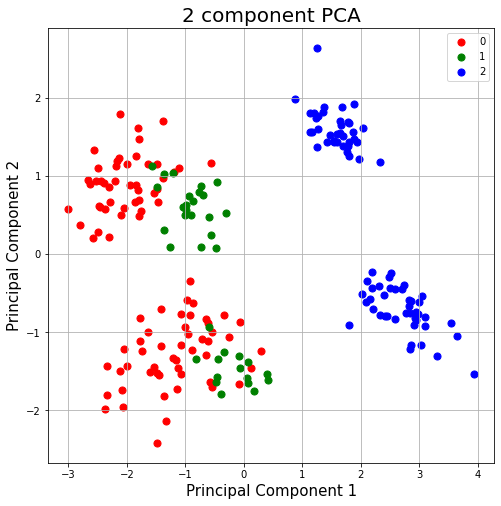

In [70]:
## Codigo obtenido de https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['species'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()